In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import csv
import numpy as np

In [65]:
p=1
log_file_1g='../Experiment Results BS N =200/{}%_1GB Logs.csv'.format(p)
log_file_1g_ns='../Experiment Results BD N = 200 no sorting/{}%_1GB Logs.csv'.format(p)

In [66]:
hit = 0
hitlist=[]
data =[]
FA = 0
Rand = 0
Total = 0
Sample_time = 0
Bootstrap_time =0
#open the data logs from the experiment
with open(log_file_1g, 'r') as file: # B=200
    reader = csv.reader(file)
    for row in reader:
        data.append(row)
    chunks = [data[x:x+10] for x in range(1, len(data), 10)]
#calculation of necessary fields for drawing the graphs
    for a in range(0,10):
        hitlist.append([])
        for b in range(0,10):
            if chunks[a][b][12]=='1':
                hit +=1
            
            FA += float(chunks[a][b][7])
            Rand += float(chunks[a][b][8])
            Total += float(chunks[a][b][9])
            Sample_time =+ float(chunks[a][b][10])
            Bootstrap_time += float(chunks[a][b][11])
        
        hit = hit*100/10
        hitlist[a].append(int(chunks[a][b][1]))      
        hitlist[a].append(hit)
        hitlist[a].append(round(FA,2)) 
        hitlist[a].append(round(Rand,2)) 
        hitlist[a].append(round(Total,2))
        hitlist[a].append(round(Sample_time,2))
        hitlist[a].append(round(Bootstrap_time,2))
        hit =0
        FA=0
        Rand =0
        Total=0
        Sample_time=0
        Bootstrap_time=0
    print(hitlist)
#put the result in to csv file
fields=["Query Number", "Hit Percentage", "File Access Time", "Rand Num Gen Time", "Other Time", "Sampling Time", "Bootstrap Time" ]
with open('graphlogs.csv', 'w+', newline='') as file:
    writer = csv.writer(file, delimiter =',')
    writer.writerow(fields)
    for l in range(0,len(hitlist)):
        writer.writerow(hitlist[l])

[[1, 100.0, 15.02, 15.72, 69.32, 4.97, 15.72], [2, 90.0, 15.09, 15.72, 64.36, 4.71, 15.72], [3, 100.0, 15.01, 15.65, 64.29, 4.63, 15.65], [4, 100.0, 15.1, 15.67, 78.38, 5.86, 15.67], [5, 90.0, 15.03, 15.67, 83.53, 6.52, 15.67], [6, 100.0, 15.06, 15.61, 74.08, 5.57, 15.61], [7, 100.0, 15.05, 15.5, 68.79, 5.07, 15.5], [8, 90.0, 15.07, 15.54, 76.62, 5.8, 15.54], [9, 100.0, 15.08, 15.57, 75.59, 5.72, 15.57], [10, 90.0, 15.19, 15.61, 64.04, 4.73, 15.61]]


In [67]:
#This part is for the second data logs file
hit = 0
hitlist=[]
data =[]
FA = 0
Rand = 0
Total = 0
Sample_time = 0
Bootstrap_time =0
with open(log_file_1g_ns, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)

    
    chunks = [data[x:x+10] for x in range(1, len(data), 10)]
    
    for a in range(0,10):
        hitlist.append([])
        for b in range(0,10):
            if chunks[a][b][12]=='1':
                hit +=1
            
            FA += float(chunks[a][b][7])
            Rand += float(chunks[a][b][8])
            Total += float(chunks[a][b][9])
            Sample_time =+ float(chunks[a][b][10])
            Bootstrap_time += float(chunks[a][b][11])
        
        hit = hit*100/10
        hitlist[a].append(int(chunks[a][b][1]))      
        hitlist[a].append(hit)
        hitlist[a].append(round(FA,2)) 
        hitlist[a].append(round(Rand,2)) 
        hitlist[a].append(round(Total,2))
        hitlist[a].append(round(Sample_time,2))
        hitlist[a].append(round(Bootstrap_time,2))
        hit =0
        FA=0
        Rand =0
        Total=0
        Sample_time=0
        Bootstrap_time=0
    print(hitlist)
fields=["Query Number", "Hit Percentage", "File Access Time", "Rand Num Gen Time", "Other Time", "Sampling Time", "Bootstrap Time" ]
with open('graphlogs2.csv', 'w+', newline='') as file:
    writer = csv.writer(file, delimiter =',')
    writer.writerow(fields)
    for l in range(0,len(hitlist)):
        writer.writerow(hitlist[l])

[[1, 100.0, 1.72, 2.75, 55.59, 5.06, 2.75], [2, 100.0, 1.74, 2.88, 51.92, 4.49, 2.88], [3, 90.0, 1.75, 2.66, 52.0, 4.55, 2.66], [4, 100.0, 1.84, 2.75, 65.18, 5.95, 2.75], [5, 100.0, 1.73, 2.62, 69.25, 6.45, 2.62], [6, 90.0, 1.72, 2.53, 61.14, 5.55, 2.53], [7, 80.0, 1.69, 2.4, 56.2, 5.07, 2.4], [8, 90.0, 1.66, 2.4, 64.08, 5.7, 2.4], [9, 90.0, 1.76, 2.44, 61.9, 5.59, 2.44], [10, 100.0, 1.63, 2.51, 51.2, 4.67, 2.51]]


In [68]:
df = pd.read_csv ('graphlogs.csv')
df2 = pd.read_csv ('graphlogs2.csv')
df['total time'] = df['File Access Time'] + df['Sampling Time']+ df['Bootstrap Time']
df2['total time'] = df2['File Access Time'] + df2['Sampling Time']+ df2['Bootstrap Time']
timedf = df.div(df2)
newdf = timedf[['File Access Time', 'Sampling Time', 'Bootstrap Time','total time']].copy()
print(newdf)

   File Access Time  Sampling Time  Bootstrap Time  total time
0          8.732558       0.982213        5.716364    3.747114
1          8.672414       1.048998        5.458333    3.899012
2          8.577143       1.017582        5.883459    3.938616
3          8.206522       0.984874        5.698182    3.475332
4          8.687861       1.010853        5.980916    3.446296
5          8.755814       1.003604        6.169960    3.697959
6          8.905325       1.000000        6.458333    3.888646
7          9.078313       1.017544        6.475000    3.730533
8          8.568182       1.023256        6.381148    3.715015
9          9.319018       1.012848        6.219124    4.032917


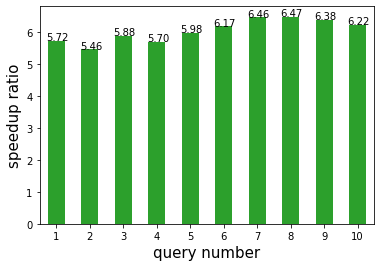

In [69]:
bs_figure_file_name='Bootstrap time Perfomance increase of 1GB data {}p.pdf'.format(p)
with PdfPages(bs_figure_file_name) as pdf:
    graph = newdf["Bootstrap Time"].plot.bar( figsize=(6, 4), color = 'C2')
    graph.set_xlabel('query number',fontsize =15)
    graph.set_ylabel('speedup ratio',fontsize =15)
    for i, v in enumerate(newdf["Bootstrap Time"]):
        graph.text(i-.3 , v+0.01 , '%.2f' % float(v))
    plt.xticks(rotation=0)
    graph.set_xticklabels(np.arange(1,11))
    pdf.savefig(bbox_inches='tight')
    
    

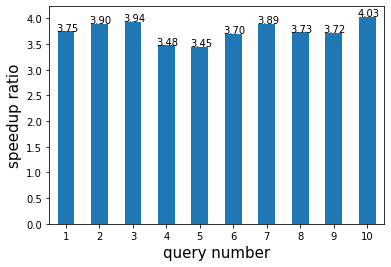

In [70]:
total_figure_file_name='Total time Perfomance increase of 1GB data {}p.pdf'.format(p)
with PdfPages(total_figure_file_name) as pdf:
    gr = newdf['total time'].plot.bar( figsize=(6, 4))
    gr.set_xlabel('query number',fontsize =15)
    gr.set_ylabel('speedup ratio',fontsize =15)
    for f, j in enumerate(newdf['total time']):
        gr.text(f-.3 , j+0.01 , '%.2f' % float(j))
    gr.set_xticklabels(np.arange(1,11))
    plt.xticks(rotation=0)
    pdf.savefig(bbox_inches='tight')